<a href="https://colab.research.google.com/github/ram8919/-/blob/main/ODB_Ram_kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# import library:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [37]:
# Load the dataset:
odb_df=pd.read_csv('odb.csv')

In [38]:
# Show the dateset:
odb_df.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195
1,1,V Kohli (INDIA),2008-2021,254,245,39,12169,183,59.07,13061,93.17,43,62,13,1140,125
2,2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162
3,3,RG Sharma (INDIA),2007-2021,227,220,32,9205,264,48.96,10354,88.90,29,43,13,832,244
4,4,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270


In [39]:
# Here drop Unnamed column:
odb_df = odb_df.drop(['Unnamed: 0'], axis=1)
odb_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195
1,V Kohli (INDIA),2008-2021,254,245,39,12169,183,59.07,13061,93.17,43,62,13,1140,125
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162
3,RG Sharma (INDIA),2007-2021,227,220,32,9205,264,48.96,10354,88.90,29,43,13,832,244
4,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270


In [40]:
# Display information about the DataFrame, including the index dtype and columns, non-null values and memory usage.
odb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  119 non-null    object 
 1   Span    119 non-null    object 
 2   Mat     119 non-null    int64  
 3   Inns    119 non-null    int64  
 4   NO      119 non-null    int64  
 5   Runs    119 non-null    int64  
 6   HS      119 non-null    object 
 7   Ave     119 non-null    float64
 8   BF      119 non-null    int64  
 9   SR      119 non-null    float64
 10  100     119 non-null    int64  
 11  50      119 non-null    int64  
 12  0       119 non-null    int64  
 13  4s      119 non-null    object 
 14  6s      119 non-null    object 
dtypes: float64(2), int64(8), object(5)
memory usage: 14.1+ KB


In [41]:
#  Returns a tuple (number of rows, number of columns)
odb_df.shape

(119, 15)

In [42]:
# Check for null values in each column
odb_df.isnull().sum()

,0
Player,0
Span,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0
BF,0
SR,0


In [43]:
# Generate descriptive statistics of the DataFrame, including count, mean, standard deviation, etc. for numerical columns.
odb_df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,119.000000,119.000000,119.00000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,194.672269,184.411765,21.10084,6306.890756,39.347983,7897.941176,81.262605,11.487395,37.008403,10.915966
std,94.879684,89.115276,15.81803,3091.187863,7.013547,3894.847910,11.402961,7.577694,20.005294,6.319971
min,33.000000,32.000000,1.00000,1447.000000,23.570000,1360.000000,55.930000,5.000000,4.000000,1.000000
25%,124.500000,120.000000,8.00000,3928.500000,34.910000,5086.000000,73.455000,6.000000,20.500000,6.000000
50%,190.000000,181.000000,16.00000,5964.000000,38.000000,7678.000000,79.980000,9.000000,36.000000,10.000000
75%,247.500000,236.500000,33.00000,8079.000000,42.450000,9780.500000,88.405000,14.500000,47.500000,15.000000
max,463.000000,452.000000,84.00000,18426.000000,67.000000,21368.000000,118.660000,49.000000,96.000000,34.000000


In [44]:
# Split the 'Player' column into 'Player' and 'Region'
odb_df[['Player', 'Region']] = odb_df['Player'].str.split(' \(', expand=True)

# Remove the trailing ')' from the 'Region' column
odb_df['Region'] = odb_df['Region'].str.rstrip(')')

# Display the modified DataFrame
odb_df.head()


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Region
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195,INDIA
1,V Kohli,2008-2021,254,245,39,12169,183,59.07,13061,93.17,43,62,13,1140,125,INDIA
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,AUS/ICC
3,RG Sharma,2007-2021,227,220,32,9205,264,48.96,10354,88.90,29,43,13,832,244,INDIA
4,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,Asia/SL


In [45]:
# Split the 'Span' column into 'Start Year' and 'End Year'
odb_df[['Start Year', 'End Year']] = odb_df['Span'].str.split('-', n=1, expand=True)

# # Drop the original 'Span' column
odb_df = odb_df.drop('Span', axis=1)
# Display the modified DataFrame
odb_df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Region,Start Year,End Year
0,SR Tendulkar,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195,INDIA,1989,2012
1,V Kohli,254,245,39,12169,183,59.07,13061,93.17,43,62,13,1140,125,INDIA,2008,2021
2,RT Ponting,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,AUS/ICC,1995,2012
3,RG Sharma,227,220,32,9205,264,48.96,10354,88.90,29,43,13,832,244,INDIA,2007,2021
4,ST Jayasuriya,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,Asia/SL,1989,2011


In [46]:
# split region column into region1 and region2

# Split the 'Region' column into two columns
odb_df[['Region1', 'Region2']] = odb_df['Region'].str.split('/', n=1, expand=True)

# Display the modified DataFrame
odb_df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Region,Start Year,End Year,Region1,Region2
0,SR Tendulkar,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195,INDIA,1989,2012,INDIA,None
1,V Kohli,254,245,39,12169,183,59.07,13061,93.17,43,62,13,1140,125,INDIA,2008,2021,INDIA,None
2,RT Ponting,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,AUS/ICC,1995,2012,AUS,ICC
3,RG Sharma,227,220,32,9205,264,48.96,10354,88.90,29,43,13,832,244,INDIA,2007,2021,INDIA,None
4,ST Jayasuriya,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,Asia/SL,1989,2011,Asia,SL


In [47]:
# Unique values in region1
odb_df['Region1'].unique()

array(['INDIA', 'AUS', 'Asia', 'SA', 'Afr', 'ICC', 'SL', 'NZ', 'PAK',
       'WI', 'ENG', 'BAN', 'IRE', 'ZIM', 'SCOT', 'AFG', 'NED'],
      dtype=object)

In [48]:
def new_co(odi):
  if odi['Region1'] is not None and odi['Region1'].isupper():
    return odi['Region2'] if odi['Region1'] == 'ICC' else odi['Region1']
  elif odi['Region'] is not None and odi['Region'].isupper() and odi['Region'] != "ICC":
    return odi['Region']
  else:
    return odi['Region2'] if odi['Region2'] is not None else "NA"


In [49]:
odb_df['Final Region'] = odb_df.apply(new_co, axis=1)
odb_df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Region,Start Year,End Year,Region1,Region2,Final Region
0,SR Tendulkar,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195,INDIA,1989,2012,INDIA,None,INDIA
1,V Kohli,254,245,39,12169,183,59.07,13061,93.17,43,62,13,1140,125,INDIA,2008,2021,INDIA,None,INDIA
2,RT Ponting,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,AUS/ICC,1995,2012,AUS,ICC,AUS
3,RG Sharma,227,220,32,9205,264,48.96,10354,88.90,29,43,13,832,244,INDIA,2007,2021,INDIA,None,INDIA
4,ST Jayasuriya,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,Asia/SL,1989,2011,Asia,SL,SL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,SK Raina,226,194,35,5615,116*,35.31,6005,93.50,5,36,14,476,120,INDIA,2005,2018,INDIA,None,INDIA
115,H Masakadza,209,208,4,5658,178*,27.73,7728,73.21,5,34,15,585,86,ZIM,2001,2019,ZIM,None,ZIM
116,RB Richardson,224,217,30,6248,122,33.41,9801,63.74,5,44,8,541+,54+,WI,1983,1996,WI,None,WI
117,BB McCullum,260,228,28,6083,166,30.41,6312,96.37,5,32,20,577,200,NZ,2002,2016,NZ,None,NZ


In [50]:
odb_df["Final Region"].unique()

array(['INDIA', 'AUS', 'SL', 'SA', 'WI', 'ICC/SL', 'NZ', 'PAK', 'ICC/SA',
       'ENG', 'ICC/INDIA', 'BAN', 'IRE', 'ZIM', 'SCOT', 'AFG', 'ICC/PAK',
       'NED'], dtype=object)

In [51]:
#check null values in final region
print(odb_df["Final Region"].isnull().sum())

0


In [52]:
# Drop region1, region2, region columns
odb_df = odb_df.drop(['Region1', 'Region2', 'Region'], axis=1)
odb_df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Start Year,End Year,Final Region
0,SR Tendulkar,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195,1989,2012,INDIA
1,V Kohli,254,245,39,12169,183,59.07,13061,93.17,43,62,13,1140,125,2008,2021,INDIA
2,RT Ponting,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,1995,2012,AUS
3,RG Sharma,227,220,32,9205,264,48.96,10354,88.90,29,43,13,832,244,2007,2021,INDIA
4,ST Jayasuriya,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,1989,2011,SL


In [53]:
odb_df[odb_df["Final Region"].isnull()]
odb_df.isna().sum()

,0
Player,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0
BF,0
SR,0
100,0


In [54]:
#removing * from HS column

odb_df["HS"] = odb_df["HS"].str.replace('*', '')
odb_df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Start Year,End Year,Final Region
0,SR Tendulkar,463,452,41,18426,200,44.83,21368,86.23,49,96,20,2016,195,1989,2012,INDIA
1,V Kohli,254,245,39,12169,183,59.07,13061,93.17,43,62,13,1140,125,2008,2021,INDIA
2,RT Ponting,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,1995,2012,AUS
3,RG Sharma,227,220,32,9205,264,48.96,10354,88.90,29,43,13,832,244,2007,2021,INDIA
4,ST Jayasuriya,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,1989,2011,SL


In [55]:
#replacing - with 0 in odi data
odb_df.replace('-', 0, inplace=True)
odb_df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Start Year,End Year,Final Region
0,SR Tendulkar,463,452,41,18426,200,44.83,21368,86.23,49,96,20,2016,195,1989,2012,INDIA
1,V Kohli,254,245,39,12169,183,59.07,13061,93.17,43,62,13,1140,125,2008,2021,INDIA
2,RT Ponting,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,1995,2012,AUS
3,RG Sharma,227,220,32,9205,264,48.96,10354,88.90,29,43,13,832,244,2007,2021,INDIA
4,ST Jayasuriya,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,1989,2011,SL


In [56]:
#check datatypes of Runs, Ave, HS, and SR
odb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        119 non-null    object 
 1   Mat           119 non-null    int64  
 2   Inns          119 non-null    int64  
 3   NO            119 non-null    int64  
 4   Runs          119 non-null    int64  
 5   HS            119 non-null    object 
 6   Ave           119 non-null    float64
 7   BF            119 non-null    int64  
 8   SR            119 non-null    float64
 9   100           119 non-null    int64  
 10  50            119 non-null    int64  
 11  0             119 non-null    int64  
 12  4s            119 non-null    object 
 13  6s            119 non-null    object 
 14  Start Year    119 non-null    object 
 15  End Year      119 non-null    object 
 16  Final Region  119 non-null    object 
dtypes: float64(2), int64(8), object(7)
memory usage: 15.9+ KB


In [57]:
#Change datatype of Runs, Ave, HS, and SR to floats
odb_df[['Runs', 'Ave', 'HS', 'SR']] = odb_df[['Runs', 'Ave', 'HS', 'SR']].astype('float')

In [58]:
odb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        119 non-null    object 
 1   Mat           119 non-null    int64  
 2   Inns          119 non-null    int64  
 3   NO            119 non-null    int64  
 4   Runs          119 non-null    float64
 5   HS            119 non-null    float64
 6   Ave           119 non-null    float64
 7   BF            119 non-null    int64  
 8   SR            119 non-null    float64
 9   100           119 non-null    int64  
 10  50            119 non-null    int64  
 11  0             119 non-null    int64  
 12  4s            119 non-null    object 
 13  6s            119 non-null    object 
 14  Start Year    119 non-null    object 
 15  End Year      119 non-null    object 
 16  Final Region  119 non-null    object 
dtypes: float64(4), int64(7), object(6)
memory usage: 15.9+ KB


In [59]:
# Select only numeric columns before calculating the mean
numeric_columns = odb_df.select_dtypes(include=['number']).columns
odb_df.groupby('Final Region')[numeric_columns].mean().sort_values('Mat').head(10)

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
Final Region,,,,,,,,,,,
NED,33.000000,32.000000,9.000000,1541.000000,119.000000,67.000000,1757.000000,87.700000,5.000000,9.000000,1.000000
SCOT,72.000000,70.000000,6.000000,2290.000000,175.000000,35.780000,2863.000000,79.980000,8.000000,8.000000,9.000000
AFG,80.000000,78.000000,3.000000,2597.000000,122.500000,34.705000,3287.500000,79.550000,5.500000,15.000000,3.500000
IRE,121.000000,118.000000,3.666667,3920.333333,153.666667,34.120000,5102.666667,76.840000,10.000000,19.333333,8.000000
ENG,125.937500,119.250000,13.187500,4131.125000,144.750000,39.038125,4952.375000,85.403125,8.312500,23.125000,8.000000
SA,180.375000,174.125000,19.875000,6725.000000,167.625000,43.928750,7702.375000,88.811250,16.125000,37.250000,8.375000
PAK,186.833333,177.277778,20.166667,5715.944444,141.000000,38.154444,7541.277778,77.667222,9.000000,33.722222,12.055556
WI,189.428571,180.285714,22.857143,6084.714286,146.714286,38.810714,8214.000000,75.824286,10.428571,36.071429,9.428571
AUS,191.437500,178.625000,23.687500,6454.187500,153.312500,42.084375,8077.937500,80.900625,11.375000,39.000000,9.562500


**Data Visualization**

In [60]:
odb_df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Start Year,End Year,Final Region
0,SR Tendulkar,463,452,41,18426.0,200.0,44.83,21368,86.23,49,96,20,2016,195,1989,2012,INDIA
1,V Kohli,254,245,39,12169.0,183.0,59.07,13061,93.17,43,62,13,1140,125,2008,2021,INDIA
2,RT Ponting,375,365,39,13704.0,164.0,42.03,17046,80.39,30,82,20,1231,162,1995,2012,AUS
3,RG Sharma,227,220,32,9205.0,264.0,48.96,10354,88.90,29,43,13,832,244,2007,2021,INDIA
4,ST Jayasuriya,445,433,18,13430.0,189.0,32.36,14725,91.20,28,68,34,1500,270,1989,2011,SL


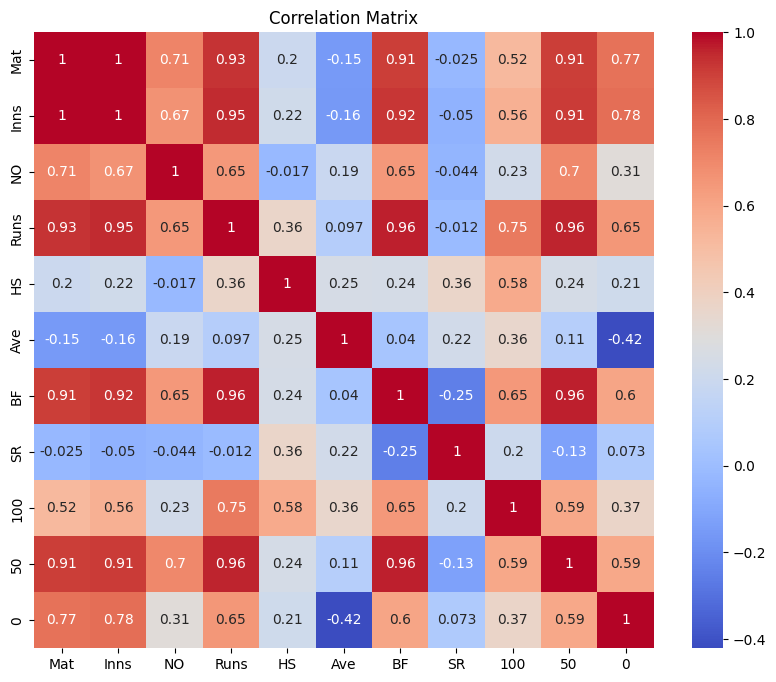

In [61]:
# Select only numeric columns
numeric_df = odb_df.select_dtypes(include=['number'])

# Calculate correlations on numeric columns only
corr = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1200x600 with 0 Axes>

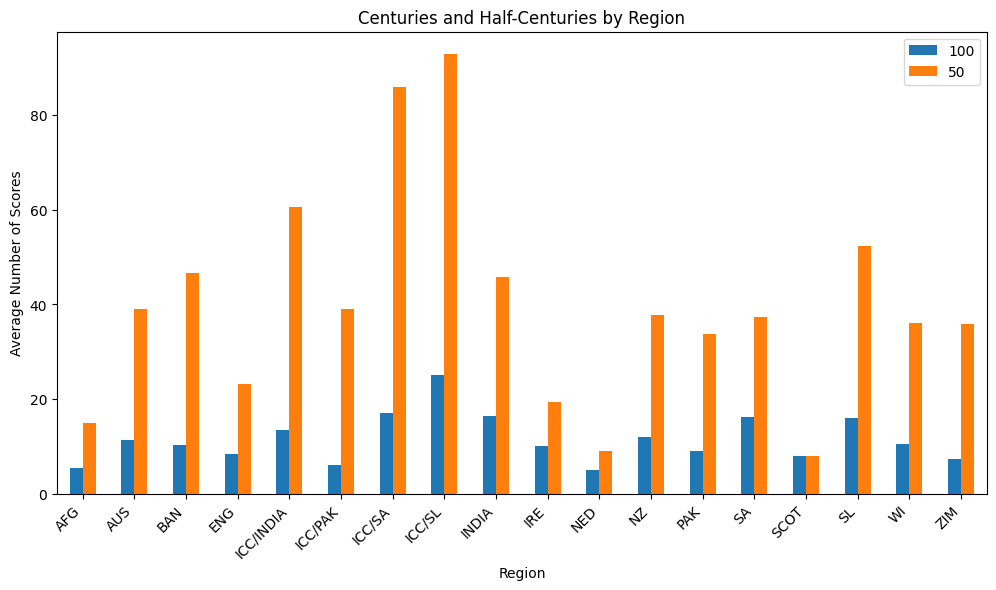

In [62]:
# @title Centuries and Half-Centuries by Region
region_stats = odb_df.groupby('Final Region')[['100', '50']].mean()

plt.figure(figsize=(12, 6))
region_stats.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Region')
plt.ylabel('Average Number of Scores')
plt.title('Centuries and Half-Centuries by Region')
_ = plt.xticks(rotation=45, ha='right')

# **Insights:**
##### - The bar chart visually compares the average number of centuries (100s) and half-centuries (50s) scored by players from different regions.
##### - This analysis helps identify regions that have historically produced players with a higher tendency to achieve these milestones.
##### - It offers a glimpse into the batting prowess associated with different cricketing regions.

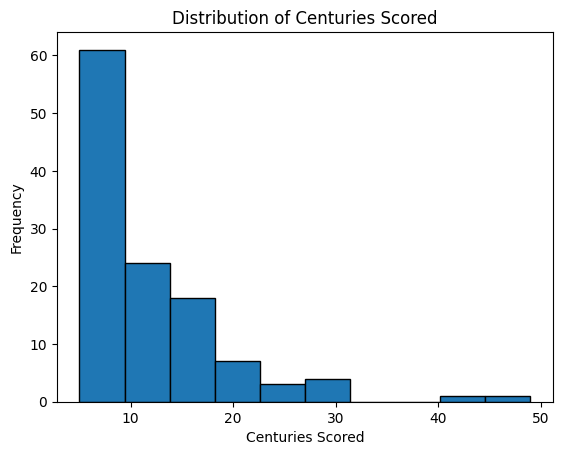

In [63]:
# @title Distribution of Centuries Scored
plt.hist(odb_df['100'], bins=10, edgecolor='black')
plt.xlabel('Centuries Scored')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Centuries Scored')

 **Insights:**
##### - The histogram illustrates the frequency distribution of centuries scored by players in the dataset.
###### - It provides insights into the rarity of achieving a century in ODI cricket.
###### - The distribution can reveal whether most players score a few centuries or if there are outliers who have amassed a significant number of centuries.


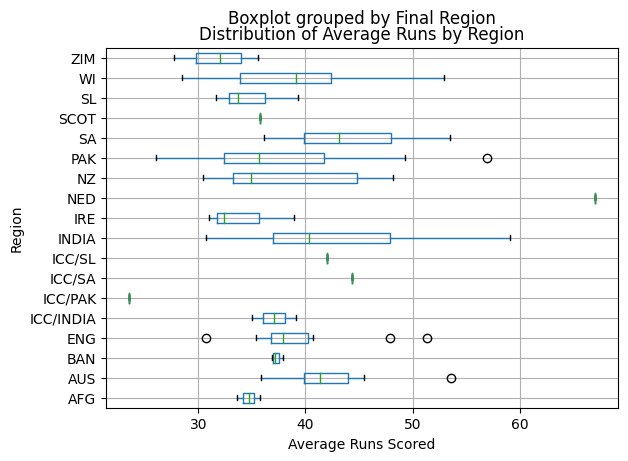

In [64]:
# @title Distribution of Average Runs by Region

odb_df.boxplot(column='Ave', by='Final Region', vert=False)
plt.xlabel('Average Runs Scored')
plt.ylabel('Region')
_ = plt.title('Distribution of Average Runs by Region')

##### **Insights:**
##### - The box plot provides a visual representation of the distribution of average runs scored by players from different regions.
##### - It allows for comparisons of median scores, ranges, and potential outliers among regions.
##### - This analysis helps identify regions with consistently high-performing batsmen or regions with greater variability in batting averages.


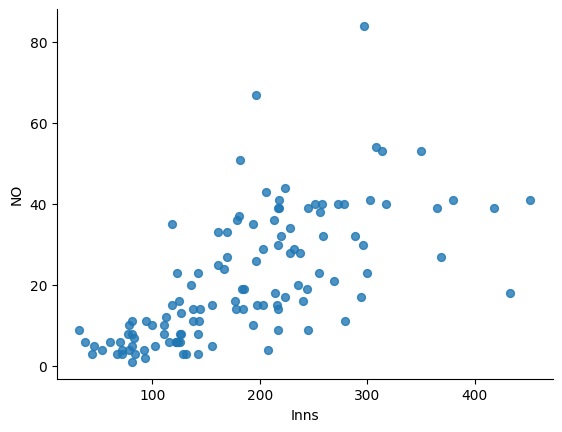

In [65]:
# @title Inns vs NO
odb_df.plot(kind='scatter', x='Inns', y='NO', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Insights:**
##### - The scatter plot explores the relationship between the number of innings played (Inns) and the number of not-outs (NO) for players in ODI cricket.
##### - Each point on the plot represents a player, and its position indicates their Inns and NO values.
##### - This visualization helps assess whether there's a correlation between the two variables.
##### - For instance, it might reveal if players with more innings played tend to have a higher number of not-outs.

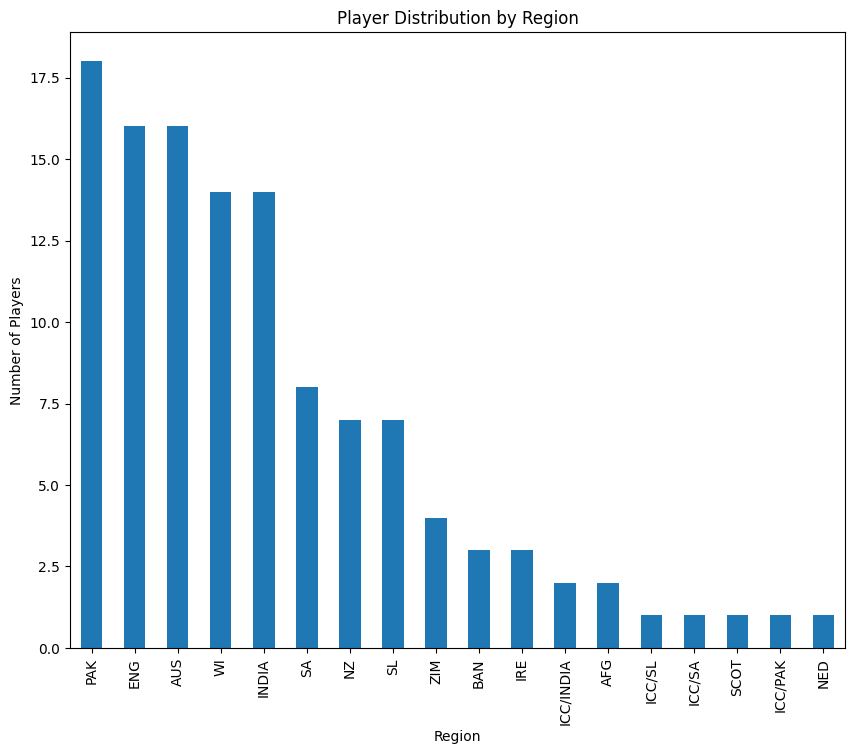

In [66]:
# @title Player Distribution by Region
plt.figure(figsize=(10,8))
odb_df['Final Region'].value_counts().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Number of Players')
_ = plt.title('Player Distribution by Region')

#### The bar chart titled "Player Distribution by Region" illustrates the number of cricket players originating from different regions. It provides a visual representation of the distribution of players across various cricketing nations and regions.

#### By examining the chart, we can identify the regions with the highest and lowest representation in the dataset. This information can be valuable for understanding the global distribution of cricketing talent and identifying potential areas for talent development.

#### Further analysis could involve comparing player performance metrics across regions to assess the relative strength of different cricketing nations.


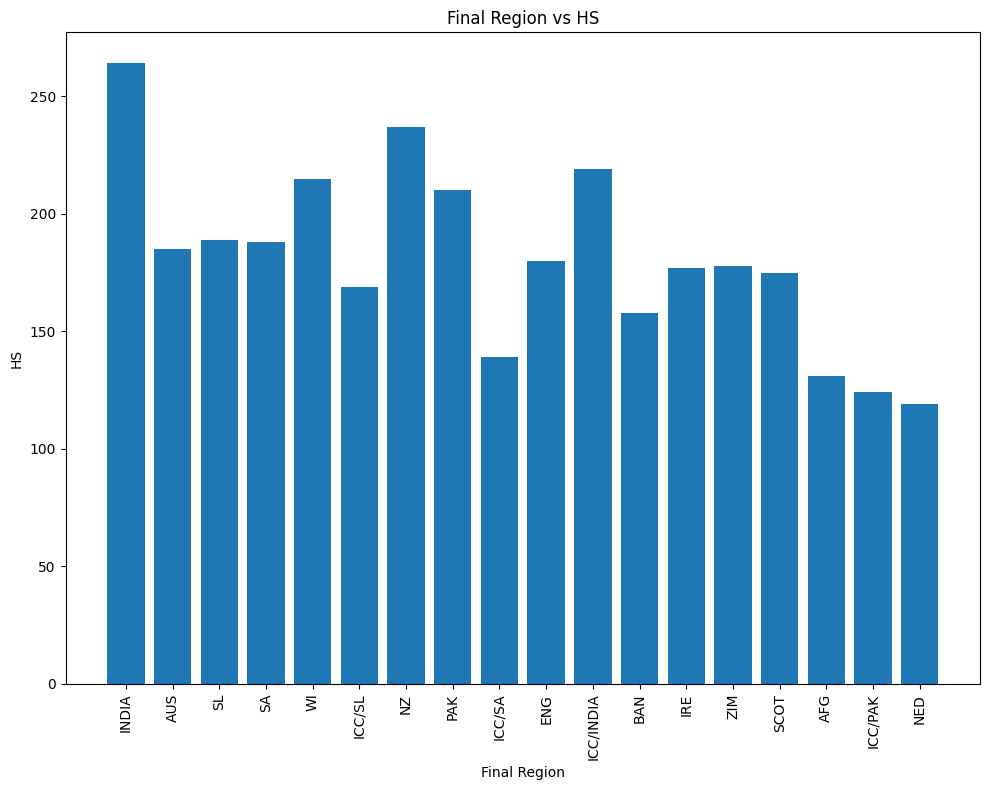

In [67]:
# Realation Between 'Final Region' and HS
plt.figure(figsize=(10, 8))
plt.bar(odb_df['Final Region'], odb_df['HS'])
plt.xlabel('Final Region')
plt.ylabel('HS')
plt.title('Final Region vs HS')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### The bar chart titled "Final Region vs HS" depicts the relationship between a player's highest score (HS) in One Day Internationals (ODIs) and their respective region. It showcases the variation in highest scores achieved by players from different cricketing regions.

#### By analyzing the chart, we can observe the distribution of high scores across regions and identify any potential trends or disparities. For instance, certain regions might exhibit a higher concentration of players with exceptional high scores, indicating a strong cricketing culture and talent pool in those areas.

#### This visualization can be valuable for understanding the influence of regional factors on individual player performance and identifying regions that consistently produce players capable of achieving remarkable high scores in ODIs.


<Figure size 1500x800 with 0 Axes>

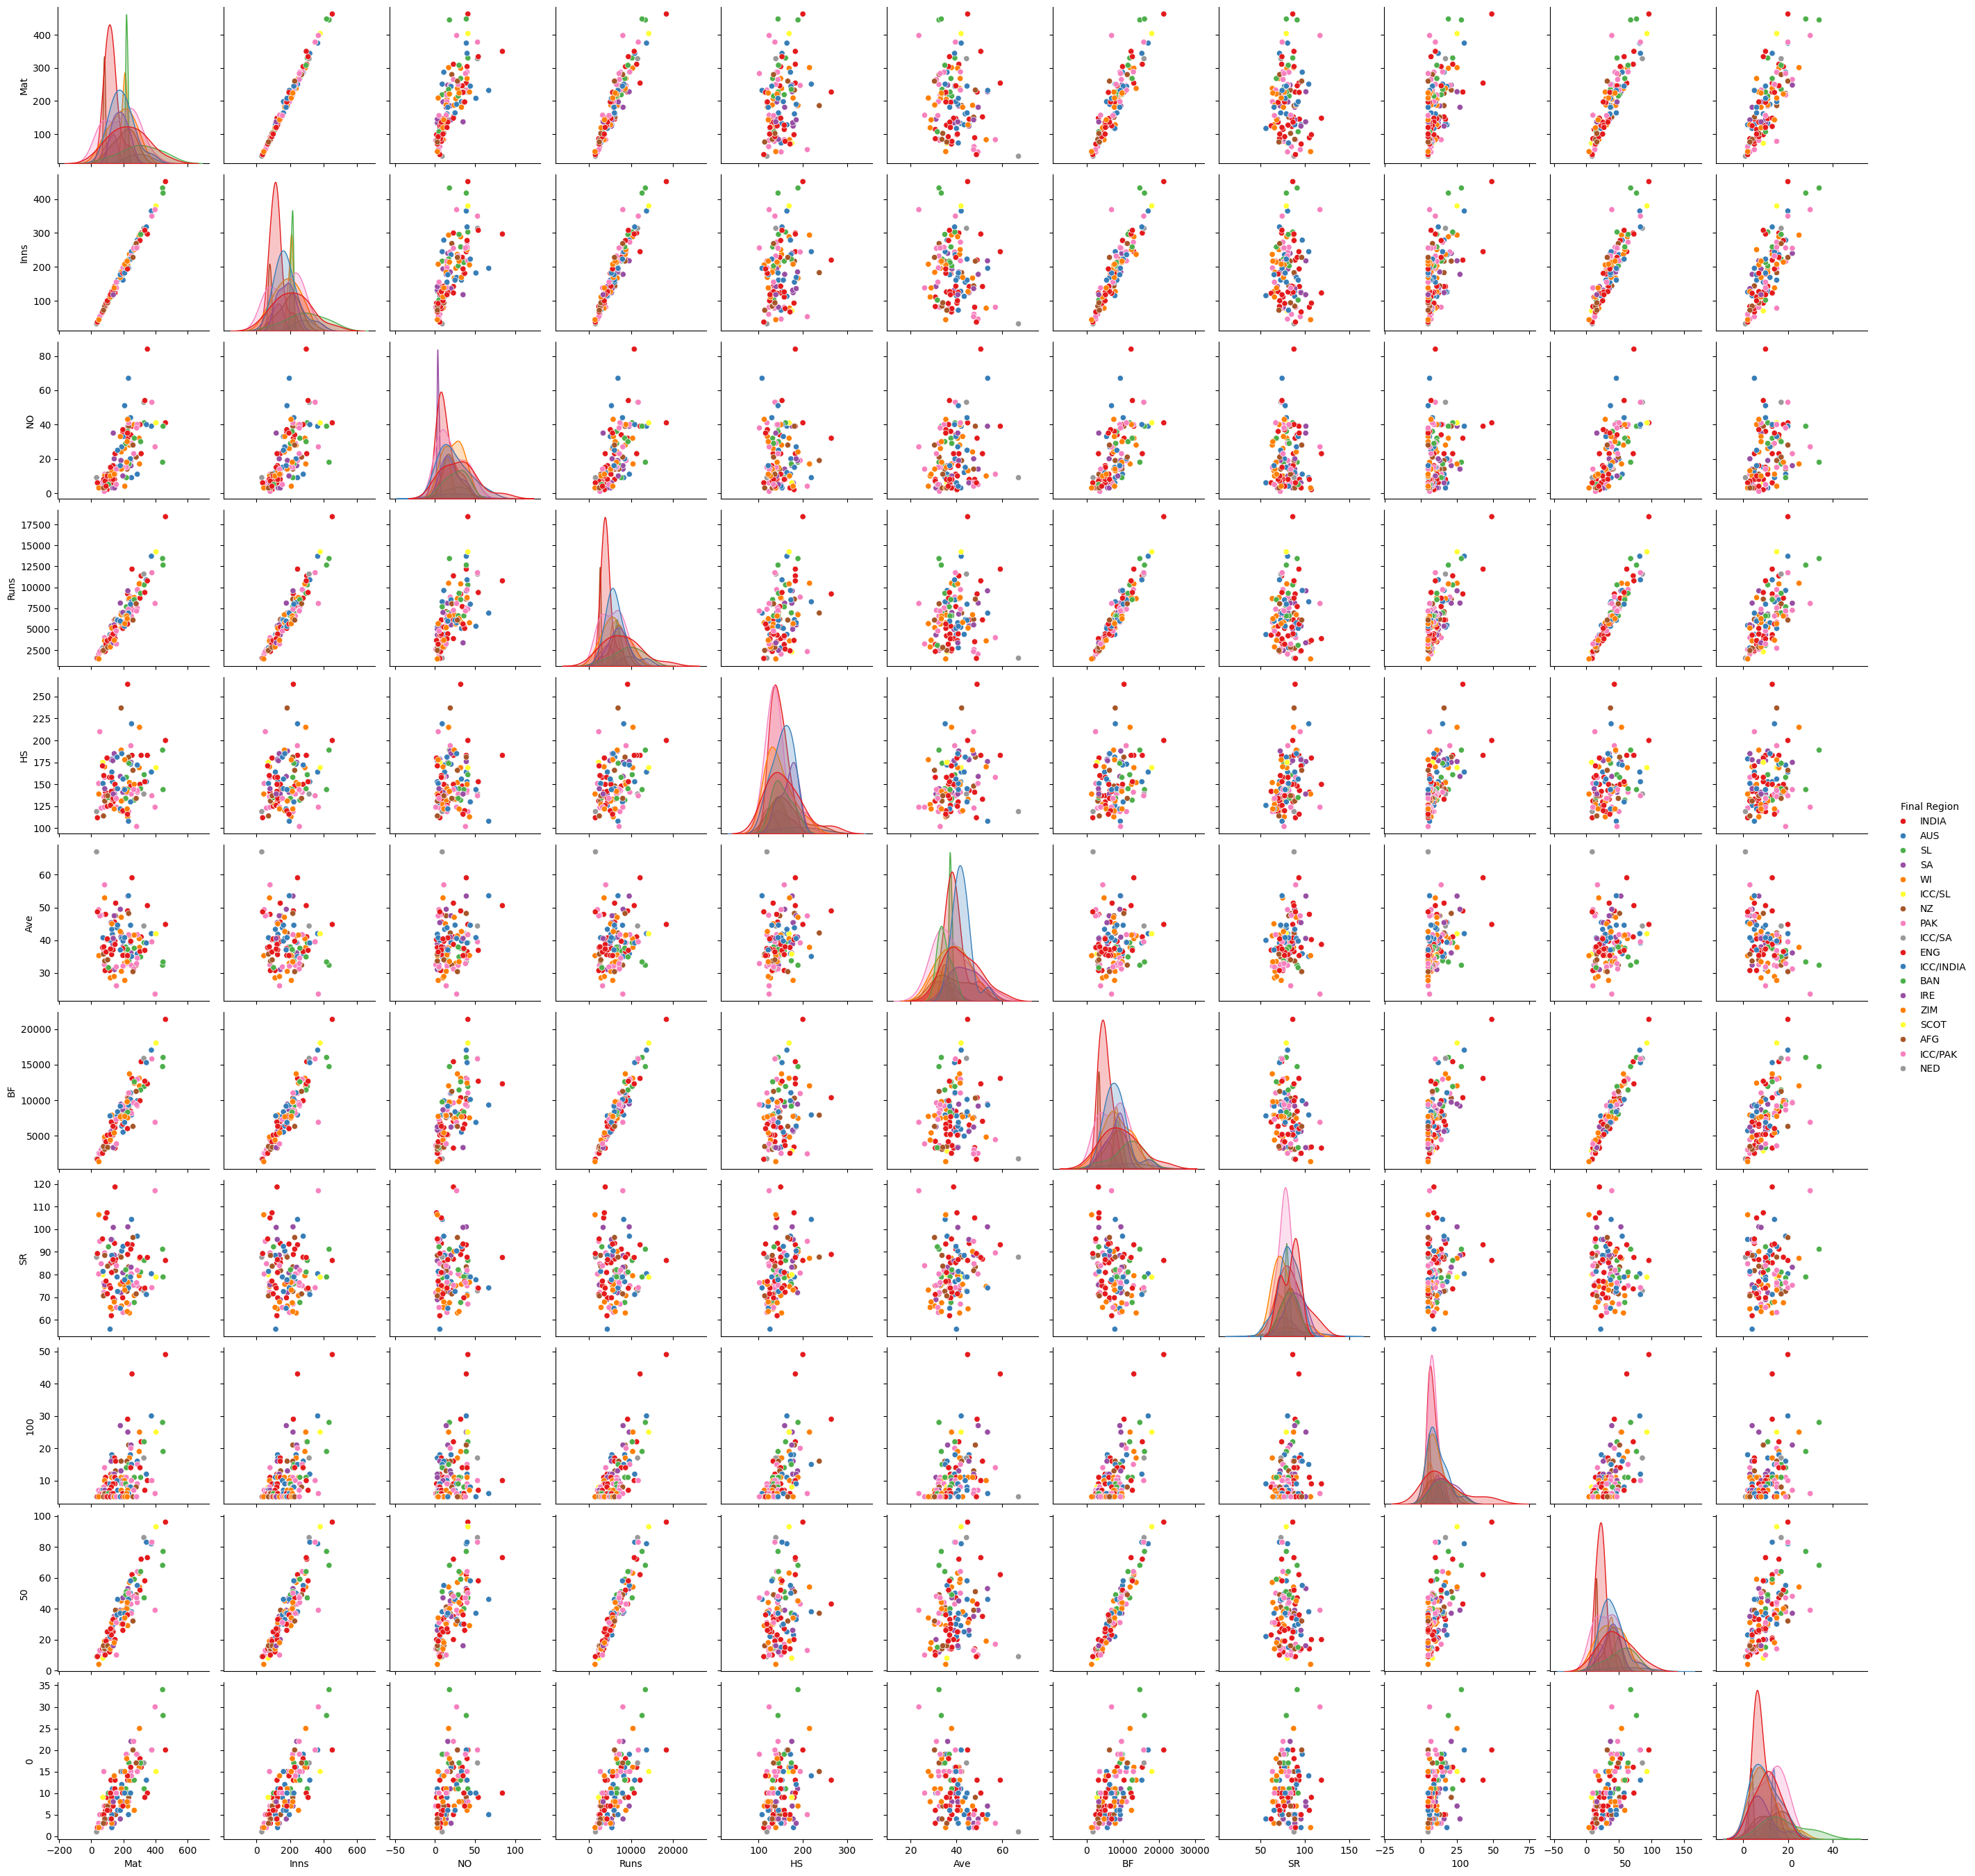

In [68]:
# Pairplot to visualize relationships between numeric variables
plt.figure(figsize=(15,8))
sns.pairplot(odb_df, hue='Final Region', palette='Set1')
plt.show()

##### The pairplot provides a visual representation of the relationships between pairs of numeric variables in the dataset, categorized by 'Final Region'. Each scatterplot within the pairplot shows the correlation between two variables, with different regions represented by distinct colors.

### Key insights from the pairplot:

##### - Positive Correlations: There appears to be a positive correlation between variables such as 'Mat' (Matches Played) and 'Runs', 'Inns' (Innings Batted), and 'NO' (Not Outs). This suggests that players who have played more matches tend to accumulate more runs, innings, and not-out innings.

##### - Negative Correlations: There might be a negative correlation between variables like 'Ave' (Average) and 'SR' (Strike Rate). This implies that players with higher averages might tend to have lower strike rates, and vice versa.

##### - Regional Variations: The distribution of points within each scatterplot, categorized by 'Final Region', reveals variations in the relationships between variables across different regions. For instance, certain regions might exhibit a tighter clustering of points, indicating a stronger correlation between specific variables within those regions.

##### - Outliers: The pairplot can also highlight potential outliers, which are data points that deviate significantly from the general trend. These outliers might warrant further investigation to understand the factors contributing to their unique characteristics.

##### Overall, the pairplot provides a comprehensive overview of the relationships between numeric variables in the dataset, allowing for a deeper understanding of the factors influencing player performance and regional variations in cricketing statistics.


In [69]:
import plotly.express as px
px.scatter(odb_df, x="HS", y="Player", animation_frame="End Year", animation_group="Final Region",
           size="Runs", color="Final Region", hover_name="Final Region",
           log_x=False, size_max=200, range_x=[10,250], range_y=[0,90], height=500)

In [70]:
# Top 10 players with the highest average runs scored
top_10_avg = odb_df.sort_values(by='Ave', ascending=False).head(10)
print("Top 10 Players with Highest Average Runs:")
print(top_10_avg[['Player', 'Ave']])

# Regions with the highest average number of matches played
region_avg_matches = odb_df.groupby('Final Region')['Mat'].mean().sort_values(ascending=False)
print("\nRegions with Highest Average Matches Played:")
print(region_avg_matches.head())

# Correlation between runs scored and strike rate
correlation_runs_sr = odb_df['Runs'].corr(odb_df['SR'])
print("\nCorrelation between Runs Scored and Strike Rate:", correlation_runs_sr)


Top 10 Players with Highest Average Runs:
              Player    Ave
97  RN ten Doeschate  67.00
1            V Kohli  59.07
30        Babar Azam  56.92
94          MG Bevan  53.58
6     AB de Villiers  53.50
51           SD Hope  52.92
23           JE Root  51.33
56          MS Dhoni  50.57
5            HM Amla  49.46
73       Imam-ul-Haq  49.34

Regions with Highest Average Matches Played:
Final Region
ICC/SL       404.000000
ICC/PAK      398.000000
ICC/SA       328.000000
SL           305.857143
ICC/INDIA    297.500000
Name: Mat, dtype: float64

Correlation between Runs Scored and Strike Rate: -0.011806581029691286


## Conclusion:

##### This comprehensive analysis of the ODI Batsmen dataset has revealed insightful patterns and trends within the world of cricket.
##### We've explored player performance metrics, regional variations, and correlations between key variables.

## Key include:

##### - Regional Strengths: Certain regions consistently produce players with higher averages, strike rates, and a greater number of centuries and half-centuries.
##### - Correlation Insights: Positive correlations exist between matches played, runs scored, innings batted, and not-outs, indicating a link between experience and performance.
##### - Average vs. Strike Rate: A potential negative correlation between average and strike rate suggests a trade-off between consistency and aggressive batting.
##### - Regional Distribution: The distribution of players across regions highlights the global reach of cricket and the varying levels of participation.

##### This analysis provides valuable insights for cricket enthusiasts, analysts, and team strategists. By understanding player performance trends and regional strengths, stakeholders can make informed decisions regarding talent scouting, team composition, and game strategies.

##### Further research could delve deeper into individual player profiles, explore temporal trends in cricketing statistics, and analyze the impact of specific playing conditions on player performance.
